## Importing necessary packages for the Analysis:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
import datetime
import math

warnings.filterwarnings("ignore")
%matplotlib inline
sns.set_style("whitegrid")

## Loading the Dataset:

In [2]:
data=pd.read_csv("../input/life-expectancy-who/Life Expectancy Data.csv")

## Getting a Brief Look at the Data:

In [3]:
data.head(3)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9


In [4]:
data.tail(3)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.0,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.0,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8
2937,Zimbabwe,2000,Developing,46.0,665.0,24,1.68,0.0,79.0,1483,...,78.0,7.10,78.0,43.5,547.358878,12222251.0,11.0,11.2,0.434,9.8


In [5]:
data.shape

(2938, 22)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

## Checking Missing Values:

In [7]:
def checkna(data):
    missing_values= data.isna().sum().reset_index()
    missing_values.columns= ["Features", "Missing_Values"]
    missing_values["Missing_Percent"]= round(missing_values.Missing_Values/len(data)*100,2)
    return missing_values[missing_values.Missing_Values > 0 ]

In [8]:
checkna(data)

,Features,Missing_Values,Missing_Percent
3,Life expectancy,10,0.34
4,Adult Mortality,10,0.34
6,Alcohol,194,6.60
8,Hepatitis B,553,18.82
10,BMI,34,1.16
12,Polio,19,0.65
13,Total expenditure,226,7.69
14,Diphtheria,19,0.65
16,GDP,448,15.25
17,Population,652,22.19


In [9]:
data.columns=['Country', 'Year', 'Status', 'Life_expectancy', 'Adult_Mortality',
       'infant_deaths', 'Alcohol', 'percentage_expenditure', 'Hepatitis_B',
       'Measles', 'BMI', 'under_five_deaths', 'Polio', 'Total_expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population',
       'thinness', 'thinness_5-9_years',
       'Income_composition_of_resources', 'Schooling']

In [10]:
y= data["Life_expectancy"]
df=  data.drop(["Life_expectancy"], axis=1)

categorical= df.select_dtypes(include= "O")
numerical= df.select_dtypes(exclude= "O")

## Exporatory Data Analysis:

### Non Graphical EDA:

In [11]:
categorical.describe()

,Country,Status
count,2938,2938
unique,193,2
top,Maldives,Developing
freq,16,2426


In [12]:
round(numerical.describe(),3)

,Year,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under_five_deaths,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness,thinness_5-9_years,Income_composition_of_resources,Schooling
count,2938.000,2928.000,2938.000,2744.000,2938.000,2385.00,2938.000,2904.000,2938.000,2919.000,2712.000,2919.000,2938.000,2490.000,2.286000e+03,2904.00,2904.000,2771.000,2775.000
mean,2007.519,164.796,30.304,4.603,738.251,80.94,2419.592,38.321,42.036,82.550,5.938,82.324,1.742,7483.158,1.275338e+07,4.84,4.870,0.628,11.993
std,4.614,124.292,117.927,4.052,1987.915,25.07,11467.272,20.044,160.446,23.428,2.498,23.717,5.078,14270.169,6.101210e+07,4.42,4.509,0.211,3.359
min,2000.000,1.000,0.000,0.010,0.000,1.00,0.000,1.000,0.000,3.000,0.370,2.000,0.100,1.681,3.400000e+01,0.10,0.100,0.000,0.000
25%,2004.000,74.000,0.000,0.878,4.685,77.00,0.000,19.300,0.000,78.000,4.260,78.000,0.100,463.936,1.957932e+05,1.60,1.500,0.493,10.100
50%,2008.000,144.000,3.000,3.755,64.913,92.00,17.000,43.500,4.000,93.000,5.755,93.000,0.100,1766.948,1.386542e+06,3.30,3.300,0.677,12.300
75%,2012.000,228.000,22.000,7.703,441.534,97.00,360.250,56.200,28.000,97.000,7.492,97.000,0.800,5910.806,7.420359e+06,7.20,7.200,0.779,14.300
max,2015.000,723.000,1800.000,17.870,19479.912,99.00,212183.000,87.300,2500.000,99.000,17.600,99.000,50.600,119172.742,1.293859e+09,27.70,28.600,0.948,20.700


#### Countries Vs Life Expectancy:

In [13]:
print("Top 10 Countries with Most Life Expectancy")
print("="*50)
print(data.groupby("Country").Life_expectancy.mean().sort_values(ascending =False).head(10))
print("="*50)
print("Top 10 Countries with Least Life Expectancy")
print("="*50)
print(data.groupby("Country").Life_expectancy.mean().sort_values(ascending =True).head(10))
print("="*50)
print(data.groupby("Country").Life_expectancy.median().sort_values(ascending =False).head(10))

Top 10 Countries with Most Life Expectancy
Country
Japan          82.53750
Sweden         82.51875
Iceland        82.44375
Switzerland    82.33125
France         82.21875
Italy          82.18750
Spain          82.06875
Australia      81.81250
Norway         81.79375
Canada         81.68750
Name: Life_expectancy, dtype: float64
Top 10 Countries with Least Life Expectancy
Country
Sierra Leone                46.11250
Central African Republic    48.51250
Lesotho                     48.78125
Angola                      49.01875
Malawi                      49.89375
Chad                        50.38750
Côte d'Ivoire               50.38750
Zimbabwe                    50.48750
Swaziland                   51.32500
Nigeria                     51.35625
Name: Life_expectancy, dtype: float64
Country
Japan          82.55
Switzerland    82.20
Iceland        81.95
Singapore      81.85
Sweden         81.80
Australia      81.80
Spain          81.75
Italy          81.70
Israel         81.60
France        

#### Countries Vs Life Expectancy on the basis of Status:

In [14]:
data.groupby("Status").Life_expectancy.mean()

Status
Developed     79.197852
Developing    67.111465
Name: Life_expectancy, dtype: float64

In [15]:
print("="*50)
print("Top 10 Developed Countries Life Expectancy")
print("="*50)
print(data[data.Status== "Developed"].groupby("Country").Life_expectancy.mean().sort_values(ascending=False).head(10))
print("="*50)
print("Top 10 Developing Countries Life Expectancy")
print("="*50)
print(data[data.Status== "Developing"].groupby("Country").Life_expectancy.mean().sort_values(ascending=False).head(10))

print("="*50)
print("Least 10 Developed Countries Life Expectancy")
print("="*50)
print(data[data.Status== "Developed"].groupby("Country").Life_expectancy.mean().sort_values(ascending=True).head(10))
print("="*50)
print("Least 10 Developing Countries Life Expectancy")
print("="*50)
print(data[data.Status== "Developing"].groupby("Country").Life_expectancy.mean().sort_values(ascending=True).head(10))

Top 10 Developed Countries Life Expectancy
Country
Japan          82.53750
Sweden         82.51875
Iceland        82.44375
Switzerland    82.33125
Italy          82.18750
Spain          82.06875
Australia      81.81250
Norway         81.79375
Austria        81.48125
Singapore      81.47500
Name: Life_expectancy, dtype: float64
Top 10 Developing Countries Life Expectancy
Country
France               82.21875
Canada               81.68750
Israel               81.30000
Greece               81.21875
Finland              80.71250
Republic of Korea    80.48750
Chile                79.45000
Costa Rica           78.59375
Cuba                 77.97500
Qatar                77.03125
Name: Life_expectancy, dtype: float64
Least 10 Developed Countries Life Expectancy
Country
Lithuania                   72.80625
Bulgaria                    72.85000
Latvia                      73.73125
Hungary                     73.82500
Romania                     74.05000
Slovakia                    74.75000
Poland

#### Countries Vs Population:

In [16]:
print("="*50)
print("Top 10 Countries with Most Population")
print("="*50)
print(data.groupby("Country").Population.mean().sort_values(ascending =False).head(10))
print("="*50)
print("Top 10 Countries with Least Population")
print("="*50)
print(data.groupby("Country").Population.mean().sort_values(ascending =True).head(10))

Top 10 Countries with Most Population
Country
India                 4.214677e+08
Indonesia             1.165553e+08
Brazil                8.812807e+07
Nigeria               7.087700e+07
Pakistan              6.902796e+07
Russian Federation    5.976209e+07
Ethiopia              4.395076e+07
Bangladesh            4.298516e+07
Germany               3.875735e+07
Philippines           3.726540e+07
Name: Population, dtype: float64
Top 10 Countries with Least Population
Country
Palau           292.0000
Tuvalu         1819.0000
Maldives       3334.2500
Georgia       10152.3750
Sri Lanka     10844.8125
Tonga         26589.8125
Israel        27862.8750
Kiribati      35919.9375
Seychelles    61543.8125
Japan         97384.0625
Name: Population, dtype: float64


#### Countries Vs GDP:

In [17]:
print("="*50)
print("Top 10 Countries with Highest GDP")
print("="*50)
print(data.groupby("Country").GDP.mean().sort_values(ascending =False).head(10))
print("="*50)
print("Top 10 Countries with Lowest GDP")
print("="*50)
print(data.groupby("Country").GDP.mean().sort_values(ascending =True).head(10))

Top 10 Countries with Highest GDP
Country
Switzerland    57362.874601
Luxembourg     53257.012741
Qatar          40748.444104
Netherlands    34964.719797
Australia      34637.565047
Ireland        33835.272005
Austria        33827.476309
Denmark        33067.407916
Singapore      32790.105907
Kuwait         31914.378339
Name: GDP, dtype: float64
Top 10 Countries with Lowest GDP
Country
Nauru           136.183210
Burundi         137.815321
Malawi          237.504042
Liberia         246.281748
Eritrea         259.395356
Niger           259.782441
Ethiopia        264.970950
Sierra Leone    271.505561
Senegal         274.611166
Guinea          279.464798
Name: GDP, dtype: float64


### Graphical EDA:

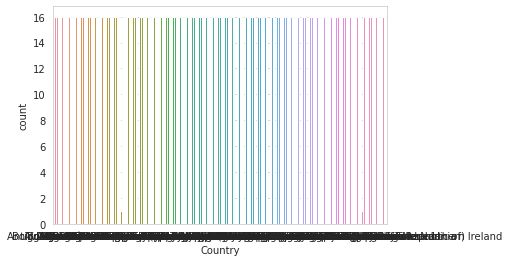

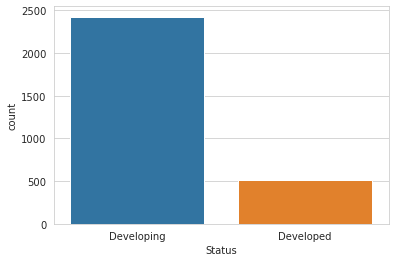

In [18]:
for feature in categorical.columns:
    sns.countplot(categorical[feature], dodge=True)
    plt.show()

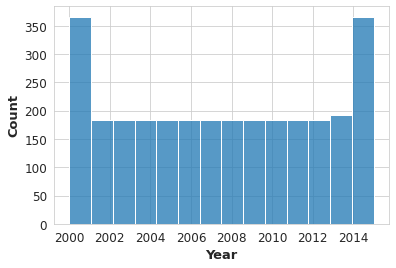

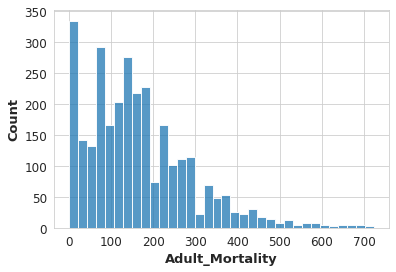

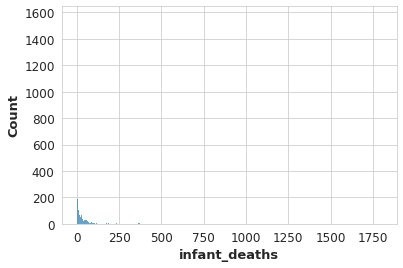

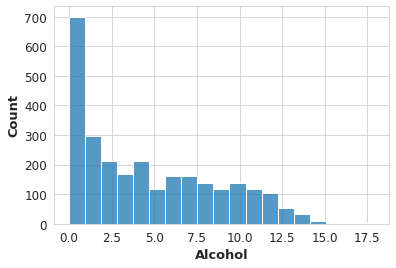

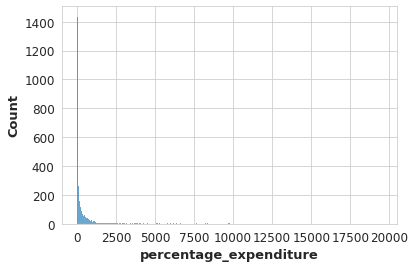

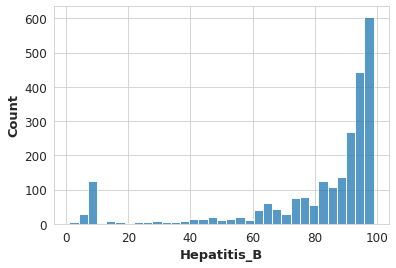

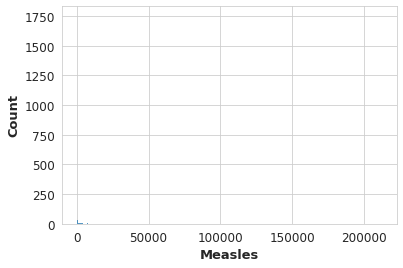

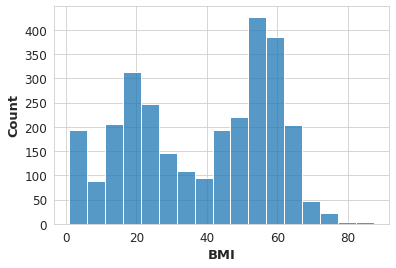

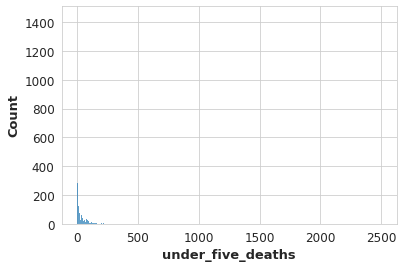

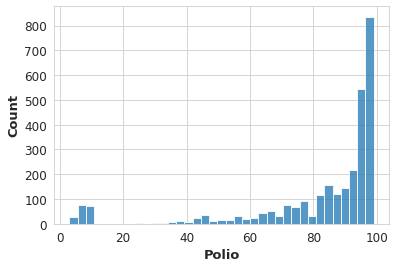

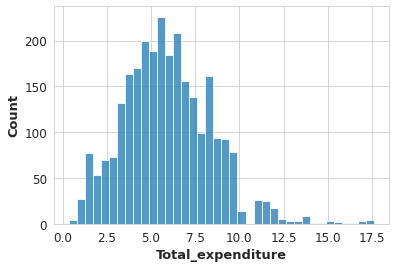

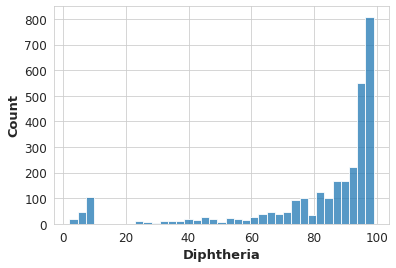

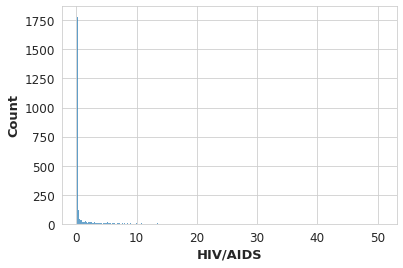

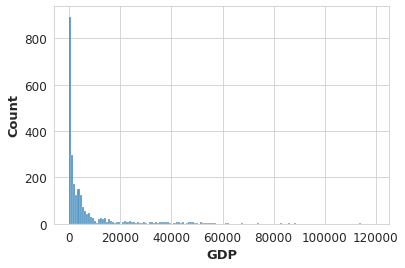

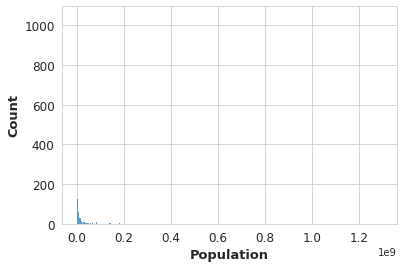

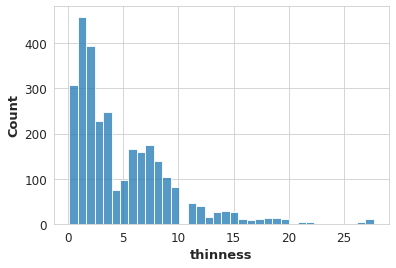

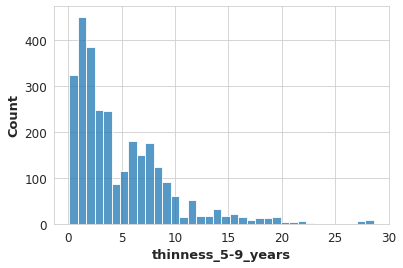

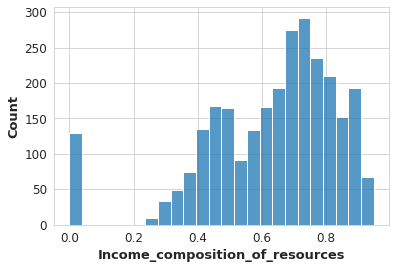

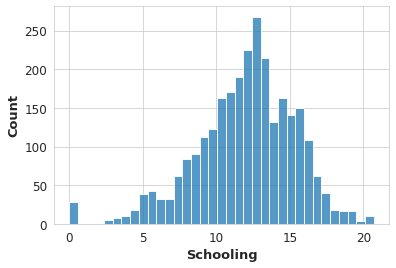

In [19]:
for feature in numerical.columns:
    sns.histplot(numerical[feature])
    plt.xticks(fontsize= 12)
    plt.yticks(fontsize=12)
    plt.ylabel("Count", fontsize= 13, fontweight="bold", name= "helvetica")
    plt.xlabel(feature, fontsize=13, fontweight="bold")
    plt.show()

Text(0.5, 0, 'Life Expectancy')

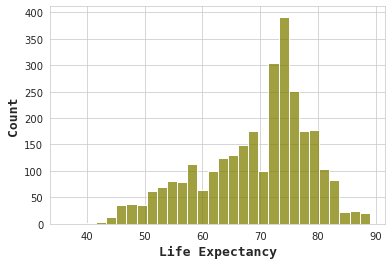

In [20]:
sns.histplot(y, color= "olive")
plt.ylabel("Count", fontsize= 13, fontweight="bold", name= "Sans", family= "monospace")
plt.xlabel("Life Expectancy", fontsize=13, fontweight="bold", family= "monospace")

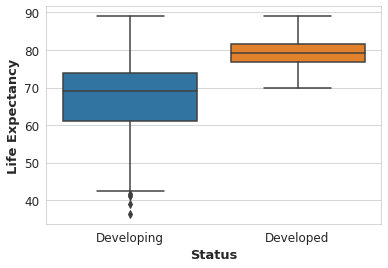

In [21]:
sns.boxplot(x= data["Status"], y= y,fliersize=5)
plt.xticks(fontsize= 12)
plt.yticks(fontsize=12)
plt.ylabel("Life Expectancy", fontsize= 13, fontweight="bold", name= "helvetica")
plt.xlabel("Status", fontsize=13, fontweight="bold")
plt.show()

Text(0.5, 0, 'Life Expectancy')

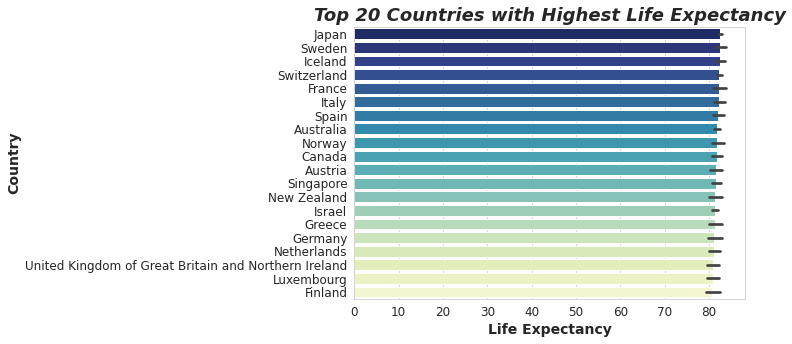

In [22]:
plt.figure(figsize= [7,5])
order= data.groupby("Country").Life_expectancy.mean().nlargest(20).index
sns.barplot(y= "Country", x= "Life_expectancy", data= data, order= order, palette= "YlGnBu_r")
plt.title("Top 20 Countries with Highest Life Expectancy", fontsize= 18,fontweight="bold", fontstyle="italic")
plt.xticks( fontsize= 12)
plt.yticks(fontsize=12)
plt.ylabel("Country", fontsize= 14, fontweight="bold")
plt.xlabel("Life Expectancy", fontsize=14, fontweight="bold")

Text(0.5, 0, 'Life Expectancy')

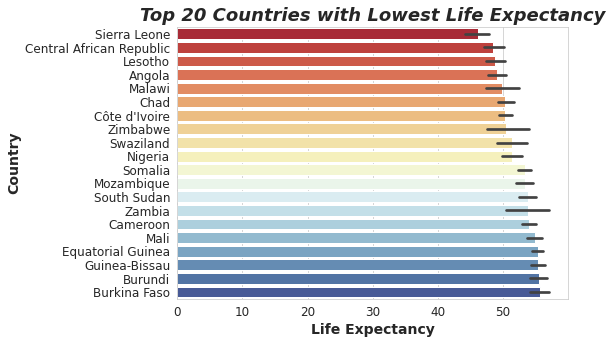

In [23]:
plt.figure(figsize= [7,5])
order=data.groupby("Country").Life_expectancy.mean().sort_values(ascending= True)[:20].index
sns.barplot(y= "Country", x= "Life_expectancy", data= data, order= order, palette= "RdYlBu")
plt.title("Top 20 Countries with Lowest Life Expectancy", fontsize= 18,fontweight="bold", fontstyle="italic")
plt.xticks(fontsize= 12)
plt.yticks(fontsize=12)
plt.ylabel("Country", fontsize= 14, fontweight="bold")
plt.xlabel("Life Expectancy", fontsize=14, fontweight="bold")

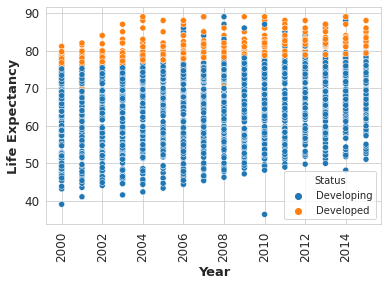

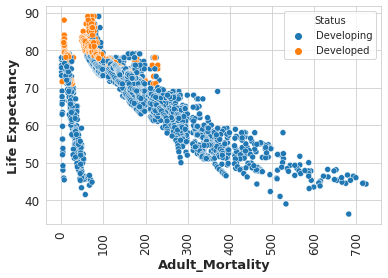

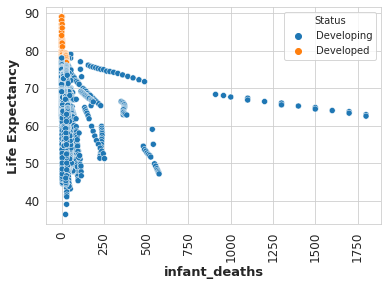

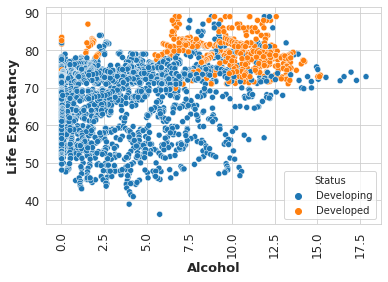

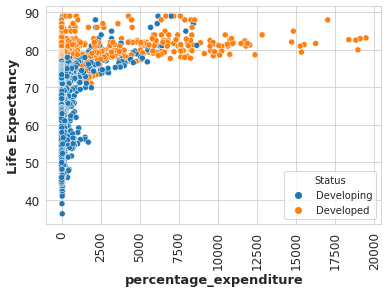

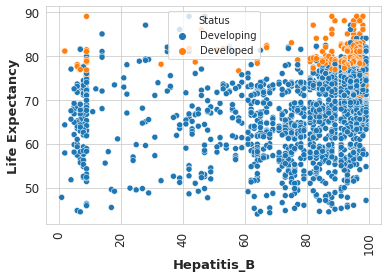

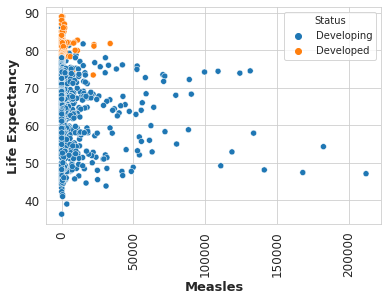

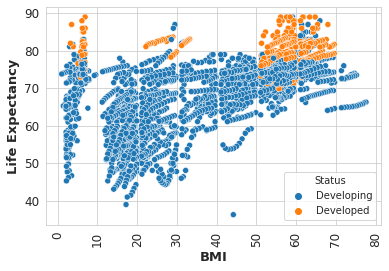

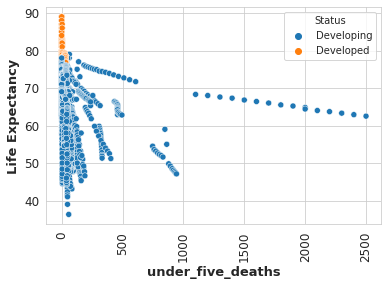

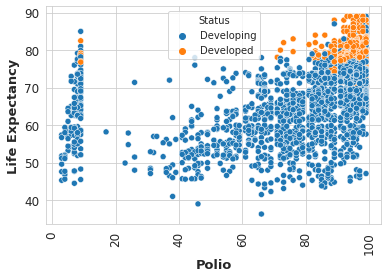

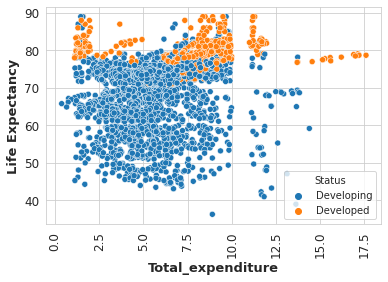

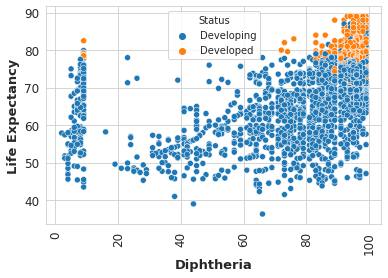

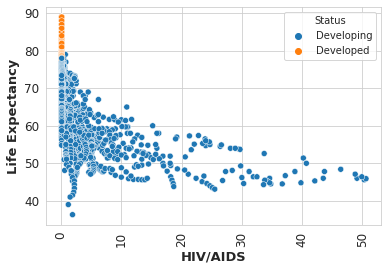

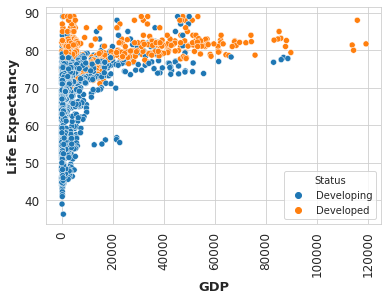

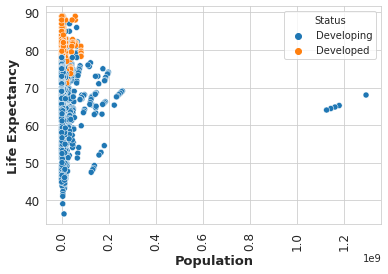

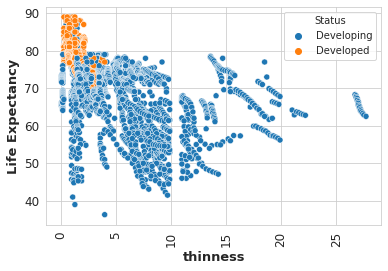

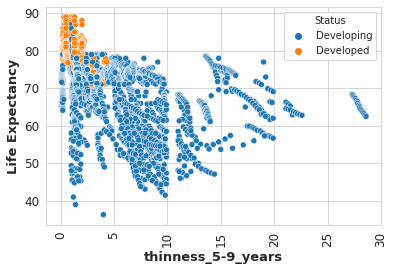

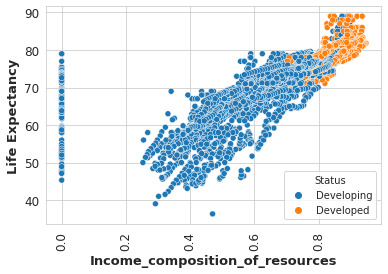

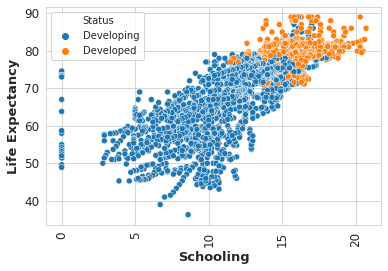

In [24]:
for feature in numerical.columns:
    sns.scatterplot(x= numerical[feature], y= y, hue= categorical.Status)
    plt.xticks(rotation=90, fontsize= 12)
    plt.yticks(fontsize=12)
    plt.ylabel("Life Expectancy", fontsize= 13, fontweight="bold", name= "helvetica")
    plt.xlabel(feature, fontsize=13, fontweight="bold")
    plt.show()

Text(0.5, 0, 'Country')

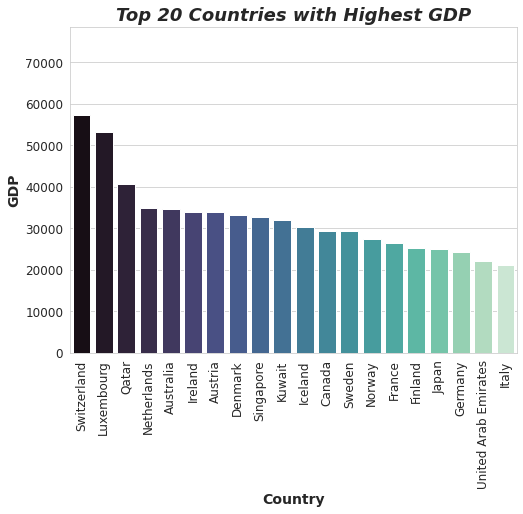

In [25]:
plt.figure(figsize= [8,6])
order= data.groupby("Country").GDP.mean().sort_values(ascending= False).head(20).index
sns.barplot(x= "Country", y= "GDP", data=data, order=order, errwidth=False, palette="mako")
plt.title("Top 20 Countries with Highest GDP", fontsize= 18,fontweight="bold", fontstyle="italic")
plt.xticks(rotation=90, fontsize= 12)
plt.yticks(fontsize=12)
plt.ylabel("GDP", fontsize= 14, fontweight="bold")
plt.xlabel("Country", fontsize=14, fontweight="bold")

Text(0.5, 0, 'Country')

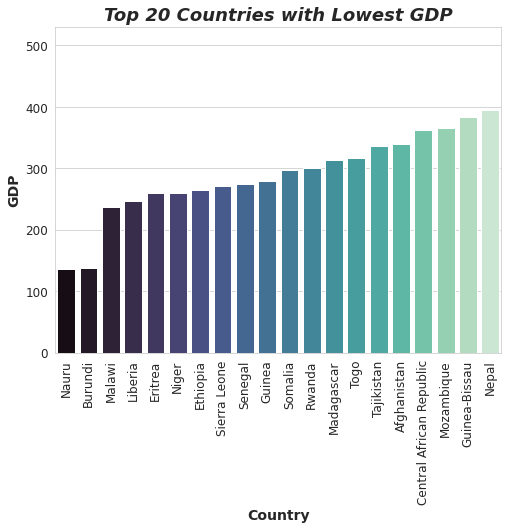

In [26]:
plt.figure(figsize= [8,6])
order= data.groupby("Country").GDP.mean().sort_values(ascending= True).head(20).index
sns.barplot(x= "Country", y= "GDP", data=data, order=order, errwidth=False, palette="mako")
plt.title("Top 20 Countries with Lowest GDP", fontsize= 18,fontweight="bold", fontstyle="italic")
plt.xticks(rotation=90, fontsize= 12)
plt.yticks(fontsize=12)
plt.ylabel("GDP", fontsize= 14, fontweight="bold")
plt.xlabel("Country", fontsize=14, fontweight="bold")

## Feature Engineering:

In [27]:
checkna(df)

,Features,Missing_Values,Missing_Percent
3,Adult_Mortality,10,0.34
5,Alcohol,194,6.60
7,Hepatitis_B,553,18.82
9,BMI,34,1.16
11,Polio,19,0.65
12,Total_expenditure,226,7.69
13,Diphtheria,19,0.65
15,GDP,448,15.25
16,Population,652,22.19
17,thinness,34,1.16


In [28]:
def imputer(data, feature, method):
    if method== "mode":
        data[feature]=data[feature].fillna(data[feature].mode()[0])
    elif method== "median":
        data[feature]=data[feature].fillna(data[feature].median())
    else:
        data[feature]=data[feature].fillna(data[feature].mean())

In [29]:
features_missing= df.columns[df.isna().any()]
for feature in features_missing:
    imputer(data= df, feature= feature, method= "mean")

In [30]:
y.fillna(y.median(), inplace=True)

##### We have imputed missing values with mean of that particular columns:

### Label Encoding:

In [31]:
from sklearn.preprocessing import LabelEncoder

In [32]:
columns= ["Country", "Year", "Status"]
for feature in columns:
    le= LabelEncoder()
    df[feature]= le.fit_transform(df[feature])
    df[feature].astype("int64")

### Feature Selection:

<AxesSubplot:>

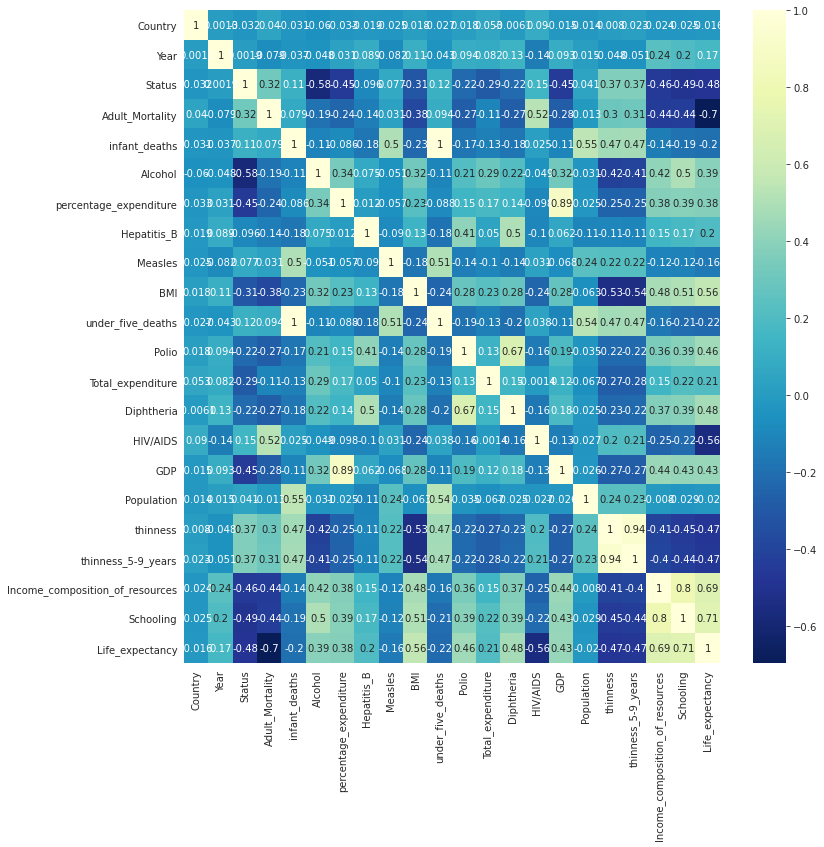

In [33]:
plt.figure(figsize= [12,12])
sns.heatmap(pd.concat([df,y], axis=1).corr(), annot=True, cmap= "YlGnBu_r")

In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
columns= [ 'Adult_Mortality', 'infant_deaths',
       'Alcohol', 'percentage_expenditure', 'Hepatitis_B', 'Measles', 'BMI',
       'under_five_deaths', 'Polio', 'Total_expenditure', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'Population', 'thinness',
       'Income_composition_of_resources', 'Schooling']
for feature in columns:
    sc= StandardScaler()
    df[[feature]]= sc.fit_transform(df[[feature]])

In [36]:
from sklearn.feature_selection import mutual_info_regression

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, 'Adult_Mortality'),
  Text(0, 1, 'Income_composition_of_resources'),
  Text(0, 2, 'thinness_5-9_years'),
  Text(0, 3, 'thinness'),
  Text(0, 4, 'Schooling'),
  Text(0, 5, 'Country'),
  Text(0, 6, 'BMI'),
  Text(0, 7, 'HIV/AIDS'),
  Text(0, 8, 'infant_deaths'),
  Text(0, 9, 'under_five_deaths'),
  Text(0, 10, 'GDP'),
  Text(0, 11, 'Alcohol'),
  Text(0, 12, 'Polio'),
  Text(0, 13, 'Diphtheria'),
  Text(0, 14, 'percentage_expenditure'),
  Text(0, 15, 'Total_expenditure'),
  Text(0, 16, 'Status'),
  Text(0, 17, 'Hepatitis_B'),
  Text(0, 18, 'Population'),
  Text(0, 19, 'Measles'),
  Text(0, 20, 'Year')])

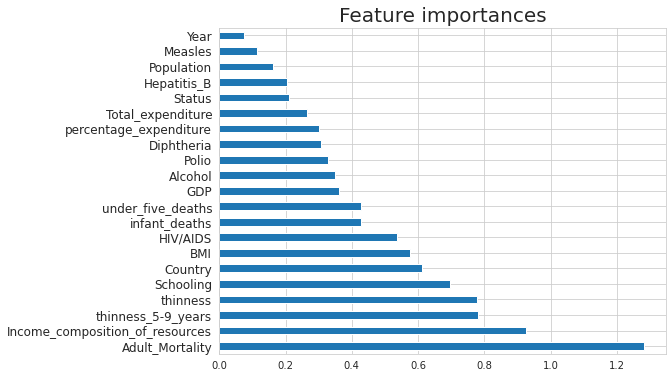

In [37]:
plt.figure(figsize= [8,6])
pd.Series(mutual_info_regression(df, y), index= df.columns).sort_values(ascending=False).plot(kind="barh")
plt.title("Feature importances", fontsize= 20)
plt.yticks(fontsize= 12)

## Training and Testing the Model

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test= train_test_split(df, y, test_size= 0.30, random_state=9)

In [40]:
columns= pd.Series(mutual_info_regression(df, y), index= df.columns).sort_values(ascending= False)[:10].index
datacopy= df[columns]
target= y
    
X_train,X_test, y_train, y_test= train_test_split(datacopy, target, test_size= 0.33, random_state=9)   

from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_percentage_error as mape, mean_squared_error as mse

    
alg= [RandomForestRegressor(), AdaBoostRegressor(), GradientBoostingRegressor(), DecisionTreeRegressor(), LinearRegression(), SVR()]
    
    
for i in alg:
    model= i
    model.fit(X_train, y_train)
    y_pred1= model.predict(X_test)
    y_pred2= model.predict(X_train)
    print(i, "Train Root Mean Squared error:", np.sqrt(mse(y_train, y_pred2)))
    print(i, "Train Accuracy:", (1-mape(y_train, y_pred2))*100)
    print("*"*50)
    print(i, "Test Root Mean Squared error:", np.sqrt(mse(y_test, y_pred1)))
    print(i, "Test Accuracy:", (1-mape(y_test, y_pred1))*100)
    print("="*70)

RandomForestRegressor() Train Root Mean Squared error: 0.6786603913808938
RandomForestRegressor() Train Accuracy: 99.37922840938246
**************************************************
RandomForestRegressor() Test Root Mean Squared error: 1.8962447393045563
RandomForestRegressor() Test Accuracy: 98.26320297103737
AdaBoostRegressor() Train Root Mean Squared error: 2.889734214671884
AdaBoostRegressor() Train Accuracy: 96.56679319756395
**************************************************
AdaBoostRegressor() Test Root Mean Squared error: 3.0830218701165752
AdaBoostRegressor() Test Accuracy: 96.3672615512924
GradientBoostingRegressor() Train Root Mean Squared error: 1.838463603185301
GradientBoostingRegressor() Train Accuracy: 98.04811027705486
**************************************************
GradientBoostingRegressor() Test Root Mean Squared error: 2.2811480536545554
GradientBoostingRegressor() Test Accuracy: 97.58626962158662
DecisionTreeRegressor() Train Root Mean Squared error: 0.0
Decis

In [41]:
rf= RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred3= rf.predict(X_test)
print( "RMSE:", np.sqrt(mse(y_test, y_pred3)))

RMSE: 1.8880419508706419


In [42]:
columns= pd.Series(mutual_info_regression(df, y), index= df.columns).sort_values(ascending= False)[:10].index
datacopy= df[columns]
target= y
    
X_train,X_test, y_train, y_test= train_test_split(datacopy, target, test_size= 0.33, random_state=9)
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor(n_estimators=90)
rf.fit(X_train, y_train)
y_pred= rf.predict(X_test)
y_pred2= rf.predict(X_train)
  
print("Test Root Mean Squared error:", round(np.sqrt(mse(y_test, y_pred)),2))
print("Test Accuracy:", round((1-mape(y_test, y_pred))*100,2))
print("Mean Absolute Percentage Error:", round(mape(y_test, y_pred)*100),2)

Test Root Mean Squared error: 1.9
Test Accuracy: 98.26
Mean Absolute Percentage Error: 2 2


Text(0.5, 0, 'Predicted')

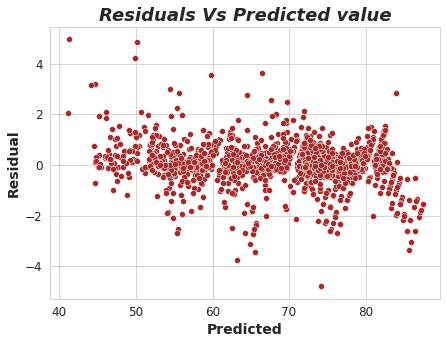

In [43]:
plt.figure(figsize= [7,5])
sns.scatterplot(y=(y_pred2-y_train), x= y_pred2,color= "brown")
plt.title("Residuals Vs Predicted value", fontsize= 18,fontweight="bold", fontstyle="italic")
plt.xticks( fontsize= 12)
plt.yticks(fontsize=12)
plt.ylabel("Residual", fontsize= 14, fontweight="bold")
plt.xlabel("Predicted", fontsize=14, fontweight="bold")

Text(0.5, 0, 'Actual')

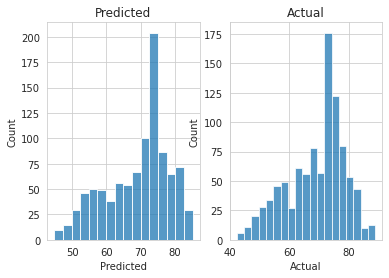

In [44]:
plt.subplot(1,2,1)
sns.histplot(y_pred)
plt.title("Predicted")
plt.xlabel("Predicted")
plt.subplot(1,2,2)
sns.histplot(y_test)
plt.title("Actual")
plt.xlabel("Actual")